## Observations and Insights 

In [143]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset and display for preview

mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
mouse_study.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [144]:
# Checking the number of mice.
beg_mice_count = mouse_study.shape[0]
print("With duplicates :", (beg_mice_count))
mice_count = mouse_study["Mouse ID"].nunique()
print("Number of Mice :", (mice_count))

With duplicates : 1893
Number of Mice : 249


In [145]:
# Check number of rows
mouse_study.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [146]:
# Checking the number of mice using the'mouse id' column and look for discrepencies

mouse_study['Mouse ID'].value_counts()


g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [147]:

# Optional: Get all the data for the duplicate mouse ID. 
#index_mouse_study = mouse_study.set_index('Mouse ID')
#index_mouse_study.loc['g989']


In [148]:
# Remove the data for any mouse with duplicate time points. Then check the number of mice in the clean DataFrame.
# Tried to drop by index but it didn't work.

# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#combine_data_drop = combine_data.drop_duplicates(subset="Mouse ID", keep="last")
#print(combine_data_drop.shape[0])
#combine_data_drop.head()


mouse_study_clean = mouse_study.drop_duplicates(subset = "Mouse ID", keep='last')
mouse_study_clean



#mouse_study_clean['Mouse ID'].value_counts()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [149]:

mouse_study_clean.count()

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

In [150]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_study_clean

## Summary Statistics

In [151]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


drug_study = mouse_study_clean.groupby("Drug Regimen")

tumor_mean = drug_study["Tumor Volume (mm3)"].mean()
tumor_median = drug_study["Tumor Volume (mm3)"].median()
tumor_var = drug_study["Tumor Volume (mm3)"].var()
tumor_std = drug_study["Tumor Volume (mm3)"].std()
tumor_sem = drug_study["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean": tumor_mean,
                              "Median": tumor_median,
                              "Variance": tumor_var,
                              "Standard Deviation": tumor_std,
                              "Standard Error of the Mean": tumor_sem})

summary_stats



,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

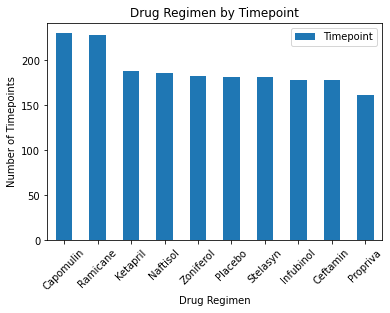

In [152]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


number_of_timepoints = mouse_study['Drug Regimen'].value_counts()

#number_of_timepoints = mouse_study_clean.groupby(['Drug Regimen'])['Timepoint'].count()

drug_study_one = pd.DataFrame({'Timepoint': number_of_timepoints})

# Chart the data, give it a title, and label the axes
drug_chart = drug_study_one.plot(kind="bar", title="Drug Regimen by Timepoint",rot=45)
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Number of Timepoints")



In [153]:
drug_study_one

,Timepoint
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Infubinol,178
Ceftamin,178
Propriva,161


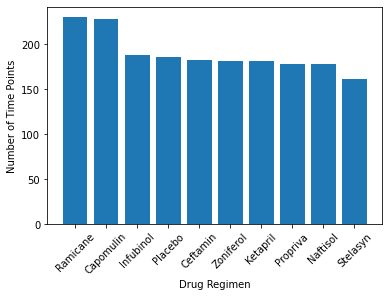

In [154]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using 
# Mathplotlib - pyplot.

x_axis = mouse_study_clean["Drug Regimen"].value_counts().index
y_axis = number_of_timepoints
plt.bar(x_axis, y_axis)
plt.xticks(rotation=45)
plt.ylabel("Number of Time Points")
plt.xlabel("Drug Regimen")
plt.show()


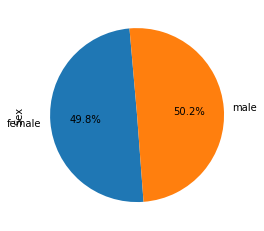

In [155]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_study = mouse_study_clean.groupby(['Sex'])['Sex'].count()
plt.pie(gender_study, labels=('female', 'male'), startangle=95, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()


<AxesSubplot:ylabel='Sex'>

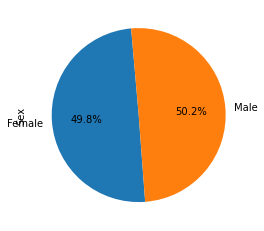

In [156]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Split up our data into groups based upon 'gender'
#gender_groups = single_mouse_study.groupby('Sex')

gender_study = mouse_study_clean.groupby(['Sex'])['Sex'].count()

gender_study.plot.pie(startangle=95,autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [157]:
# Calculate the final tumor volume of each mouse across four of the top treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Find the max timepoint for each mouse
max_time = pd.DataFrame(mouse_study.groupby('Mouse ID')['Timepoint'].max())
max_time

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
vol_time = pd.merge(max_time, mouse_study_clean, on=('Mouse ID', 'Timepoint'), how='left')

#Delete unnecessary columns
#del grouped_school_spending["Total Students"]
#del grouped_school_spending["Total School Budget"]
#del grouped_school_spending["Per Student Budget"]

vol_time.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [158]:
# Rename the timepoint column and delete any unecessary columns
vol_time = vol_time.rename(columns={"Timepoint": "Max Timepoint"})
vol_time.head(10)

,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [159]:
#vol_time.value_counts()

In [160]:
# Put treatments into a list for the for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Find each drug in the list
# Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatments: 
 
    # Create a series that consists of all final volume values for each regimen
    vol_values = vol_time['Tumor Volume (mm3)']
    vol_data.append(vol_values)
    print(vol_data)
   
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = vol_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for the tumor volume for {x} is {iqr}')

    #Find upper and lower bounds to determine if there are any potential outliers.
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {x}: {lower_bound}')
    print(f'Upper Bound for {x}: {upper_bound}')


    # Determine outliers using upper and lower bounds  - how?????  
    #print(f"Values below {lower_bound} could be outliers.")
    #print(f"Values above {upper_bound} could be outliers.")

    
    
    
    
    
    
    
    
    

[0      67.973419
1      65.525743
2      70.717621
3      62.999356
4      63.440686
         ...    
244    48.710661
245    30.638696
246    62.754451
247    65.741070
248    73.867845
Name: Tumor Volume (mm3), Length: 249, dtype: float64]
IQR for the tumor volume for Capomulin is 19.022849680000007
Lower Bound for Capomulin: 17.400437649999986
Upper Bound for Capomulin: 93.49183637000002
[0      67.973419
1      65.525743
2      70.717621
3      62.999356
4      63.440686
         ...    
244    48.710661
245    30.638696
246    62.754451
247    65.741070
248    73.867845
Name: Tumor Volume (mm3), Length: 249, dtype: float64, 0      67.973419
1      65.525743
2      70.717621
3      62.999356
4      63.440686
         ...    
244    48.710661
245    30.638696
246    62.754451
247    65.741070
248    73.867845
Name: Tumor Volume (mm3), Length: 249, dtype: float64]
IQR for the tumor volume for Ramicane is 19.022849680000007
Lower Bound for Ramicane: 17.400437649999986
Upper Bound for

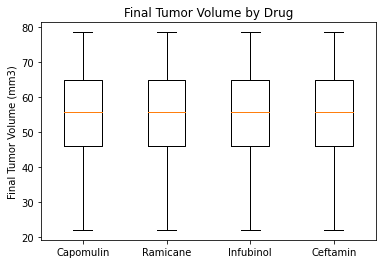

In [161]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Plot boxplot

plt.boxplot(vol_data)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

red_square = dict(markerfacecolor='r', marker='s')

plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

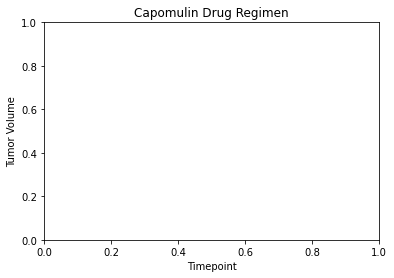

In [162]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#plt.plot(timepoint_cap,vol_data_cap)
plt.title("Capomulin Drug Regimen")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')



Text(0, 0.5, 'Tumor Volume (mm3)')

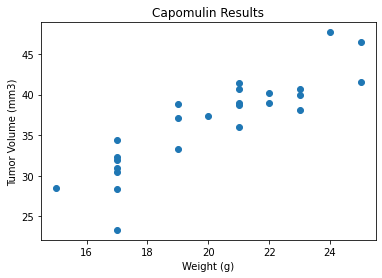

In [163]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin"]
#capomulin_df

x_values = capomulin_df["Weight (g)"]
y_values = capomulin_df["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values)
plt.title("Capomulin Results")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")




# If I want to include the equation on the same grid as the scatter plot I need to define line_eq first
#plt.annotate(line_eq,(20,15),fontsize=15,color="red")
#plt.show()



## Correlation and Regression

The correlation coefficient r-value is 0.88
y = 1.75x +1.45


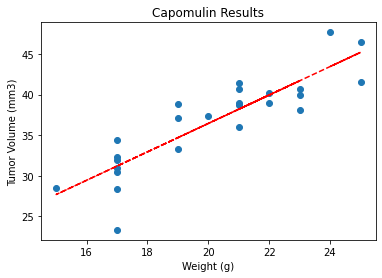

In [171]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient r-value is {round(correlation[0],2)}")

slope, int, r, p, std_err = st.linregress(x_values, y_values)
regress_values = slope * x_values + int
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "--", color="r")
plt.title("Capomulin Results")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

